
                                            ESCUELA POLITECNICA NACIONAL
                                         FACULTAD DE INGENIERÍA DE SISTEMAS
                                                    PYTHON Y R
---                                        
**Tema:** Gráficos de la plataforma de juegos usando *MatPlotLib*

**Grupo:** Python Learners

**Integrantes:** 
* Cerón Laura
* Cuasqui Pedro
* Quinchiguango Yadira
---

##### CONSTRUCCION DE DATOS DE PRUEBA

In [6]:
from faker import Faker
from faker_credit_score import CreditScore #Usar para crear socre de juegos Fuente: https://pypi.org/project/faker-credit-score/
import pandas as pd
import random
fake = Faker()
fake.add_provider(CreditScore) #Instancia un objeto de Clase CreditScore. Instalar en ananconda promtp :  pip install faker-credit-score

# Numero de filas de la base a crear
numero_casos=100000

fecha = []
usuario = []
puntaje = []
juego = []
tipo_juego = []
tiempo_juego = []
posicion_jugador = []
nivel = []
juegos =[{"nombre":"OSU", "tipo":"Arcade"},{"nombre":"Snake","tipo":"Estrategia"},{"nombre":"Mario", "tipo":"Aventura"},{"nombre":"GuitarHero", "tipo":"Acción"}]

# Generacion de datos de prueba
for _ in range(numero_casos):
    #crea fechas
    fecha.append(fake.date(pattern='%Y-%m-%d', end_datetime=None))
    #crea usuarios
    usuario.append(fake.name())
    #crea puntaje
    puntaje.append(fake.credit_score()) #instalar en ananconda promtp :  pip install faker-credit-score
    #crea nombre de juego    
    juego_random=random.choice(juegos)    
    juego.append(juego_random["nombre"])
    #crea tipos de juego
    tipo_juego.append(juego_random["tipo"])
    #crea tiempos de juego
    tiempo_juego.append(random.random()*2)
    #crea posiciones de usuario
    posicion_jugador.append(random.choice(["Primero","Segundo","Tercero","Cuarto", "Quinto","Sexto","Séptimo","Octavo","Noveno","Décimo"]))
    #crea niveles de dificultad
    nivel.append(random.choice(["Facil","Intermedio","Dificil"]))

frame = { 'fecha': pd.Series(fecha), 'usuario': pd.Series(usuario), 'puntaje':pd.Series(puntaje), 'juego':pd.Series(juego), 'tipo_juego':pd.Series(tipo_juego), 'tiempo_juego':pd.Series(tiempo_juego), 'posicion_jugador':pd.Series(posicion_jugador), 'nivel':pd.Series(nivel)} 
df = pd.DataFrame(frame) #USAR ESTE DATAFRAME PARA LOS GRAFICOS

### Matplotlib
Matplotlib es una biblioteca para la generación de gráficos a partir de datos contenidos en listas o arrays en el lenguaje de programación Python y su extensión matemática NumPy. Proporciona una API, pylab, diseñada para recordar a la de MATLAB.

Para poder usarla debemos importarla como se muestra a continuación.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### GRÁFICO DE PASTEL 
##### Porcentaje de veces que los usuarios han ingresado a la plataforma
El usuario Michael Smith es quien más ingresa a la plataforma

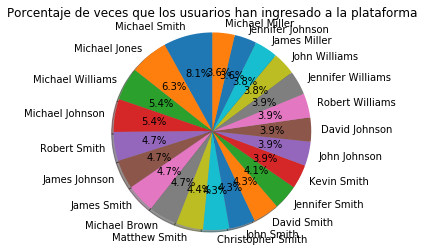

In [32]:
categorias = df["usuario"].value_counts()

#Obtener los nombres del indice
indice = list(categorias[(categorias>22)].index)
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = indice
sizes = categorias[(categorias>22)] #se toman solo a quienes han ingresado más de 22 veces
plt.pie(sizes,  labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Porcentaje de veces que los usuarios han ingresado a la plataforma")
plt.show()

#### GRÁFICO DE DISPERSIÓN 
##### Número de usuarios por nivel de juego

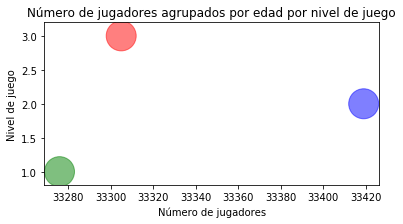

In [15]:
edad_random= np.random.randint(low=17, high=75,size=100000)
df['edad']=edad_random
#--------------------
edades=df["usuario"]
nivelEdad= df[["usuario","nivel"]]
nivelEdad_1 = nivelEdad.groupby("nivel").count()
cod_nivel=[3,1,2] #se coloca un número para indicar el nivel de dificultad, 3 es dificil, 1 es facil y 2 es medio
nivelEdad_1["nivel"]=cod_nivel
#---
x=nivelEdad_1["usuario"]
y=nivelEdad_1["nivel"]
colors=["red","green","blue"]
area=(30*1)**2
plt.figure(figsize=(6,3))
plt.scatter(x,y, s= area, c=colors, alpha=0.5)
plt.title("Número de jugadores agrupados por edad por nivel de juego")
plt.xlabel("Número de jugadores")
plt.ylabel("Nivel de juego")
plt.show()

#### GRÁFICO DE BARRAS  
##### Usuarios que ha conseguido el mayor numero de primeros lugares
El usuario Michael Jones ha obtenido el primero lugar 6 veces al igual que Robert Browns. Asi mismo tenemos 6 usuarios que han consguido el primer lugar 5 veces.

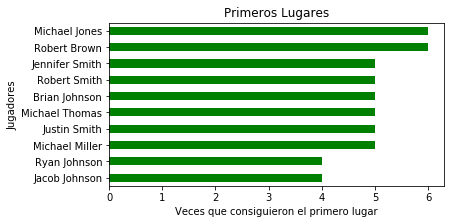

In [31]:
plt.figure(figsize=(6,3))
plt.title('Primeros Lugares')
plt.xlabel("Veces que consiguieron el primero lugar")
plt.ylabel("Jugadores")
primer_lugar = df.usuario[df.posicion_jugador=="Primero"].value_counts()[:10].sort_values().plot(kind='barh', color = 'Green')
plt.show()

#### GRÁFICO LINEAL 
##### El nivel preferido por los usuarios
No existe una gran diferencia entre el nivel de dificultad elegido por los usuarios, ligeramente el nivel intermedio es el preferido.

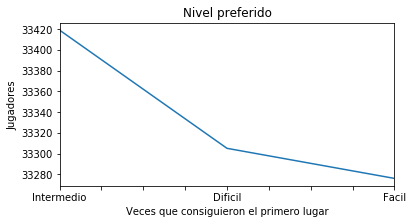

In [35]:
plt.figure(figsize=(6,3))
plt.title('Nivel preferido')
plt.xlabel("Veces que consiguieron el primero lugar")
plt.ylabel("Jugadores")
nivel_preferido = df.nivel.value_counts().sort_values(ascending=False).plot()
plt.show()

### Bibliografía

*https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/*

*https://pypi.org/project/faker-credit-score/*